In [91]:
import numpy as np
import pandas as pd

import os

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

import re
stopword = nltk.corpus.stopwords.words('english')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, ImageColorGenerator



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhananjay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhananjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhananjay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Projects\\Addittional Project\\Extra work Addittional Projects\\Twitter Sentiment Analysis'

### Problem Stataement
The objective of this task is to detect hate speech in tweets.
For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it.
So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is negative/racist/sexist
and label '0' denotes the tweet is positive/not racist/sexist, your objective is to predict the labels on the test dataset.

In [93]:
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')


In [94]:
df_train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [95]:
df_sample=pd.read_csv('sample_submission.csv')

### Data Info

train.csv - For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.


test.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### Statistical Summary

In [97]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31962.0,15981.500000,9226.778988,1.0,7991.25,15981.5,23971.75,31962.0
label,31962.0,0.070146,0.255397,0.0,0.00,0.0,0.00,1.0


In [98]:
df_train.describe(include=object).T

,count,unique,top,freq
tweet,31962,29530,#model i love u take with u all the time in ...,319


### Checking Nulls

In [99]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [100]:
df_train.tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [101]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [102]:
df_train.shape

(31962, 3)

In [103]:
df_train.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

## DATA PREPROCESSING

In [104]:
#convert uppercase letters to lowercase letters in "tweet" columns

df_train["tweet"] = df_train["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_test["tweet"] = df_test["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [105]:
#delete punctuation marks from "tweet" columns

df_train["tweet"] =df_train["tweet"].str.replace('[^\w\s]','')
df_test["tweet"] = df_test["tweet"].str.replace('[^\w\s]','')


In [106]:
#delete numbers from "tweet" columns

df_train['tweet'] = df_train['tweet'].str.replace('\d','')
df_test['tweet'] = df_test['tweet'].str.replace('\d','')


In [107]:
#delete stopwords from "tweet" columns

sw = stopwords.words("english")
df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df_test['tweet'] = df_test['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [108]:
#lemmatization. That is, we get the roots of the words in the "tweet" columns

df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_test['tweet'] = df_test['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [109]:
# Backup data with all columns
df_train_treated=df_train.copy(deep=True)
df_test_treated=df_test.copy(deep=True)

In [110]:
#drop "id" column from datasets

df_train = df_train.drop("id", axis = 1)
df_test = df_test.drop("id", axis = 1)

'''def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+','',text_lc)
    tokens = word_tokenize(text_rc,language='english')
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    return text
    '''

'''df['clean_tweet'] = df['tweet'].apply(lambda x: clean_text(x))'''

In [111]:
df_train.head(10)

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð ðððð ððð
4,0,factsguide society motivation
5,0,huge fan fare big talking leave chaos pay disp...
6,0,user camping tomorrow user user user user user...
7,0,next school year year examsð cant think ð scho...
8,0,love land allin cavs champion cleveland clevel...
9,0,user user welcome im gr


### VISUALIZATION WITH WORD CLOUD

#### the most frequent words

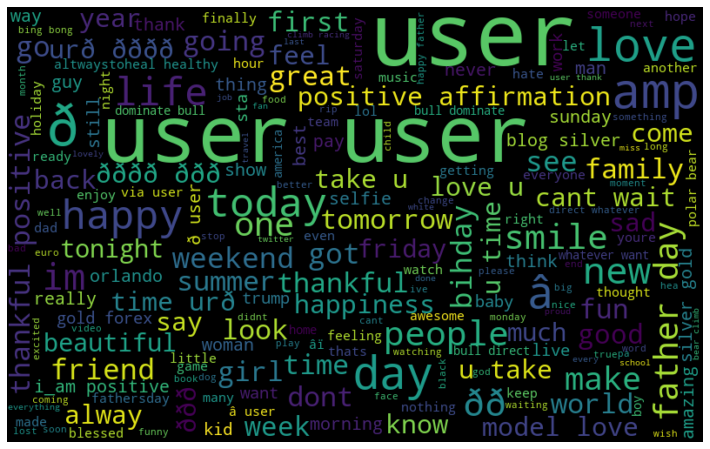

In [112]:
#the most frequently used words
all_words = " ".join([sentence for sentence in df_train.tweet])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### frequently used positive words

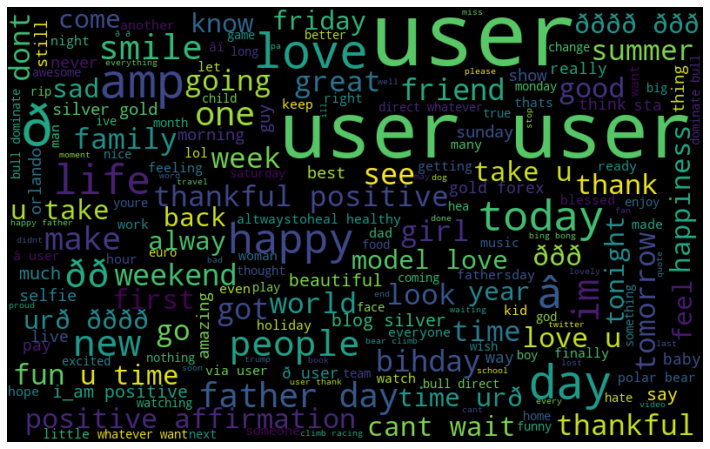

In [113]:
# frequently used positive words
all_words = " ".join([sentence for sentence in df_train['tweet'][df_train['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [114]:
all_words = " ".join([sentence for sentence in df_train['tweet'][df_train['label']==0]])
len(all_words)

1714979

In [115]:
# Print the percentage of positive tweets
ptweets = df_train[df_train['label']==0]
ptweets = ptweets['tweet']
ptweets

print('percent of positive tweets',round( (ptweets.shape[0] / df_train.shape[0]) * 100 , 1),"%")

percent of positive tweets 93.0 %


#### frequently used negative words

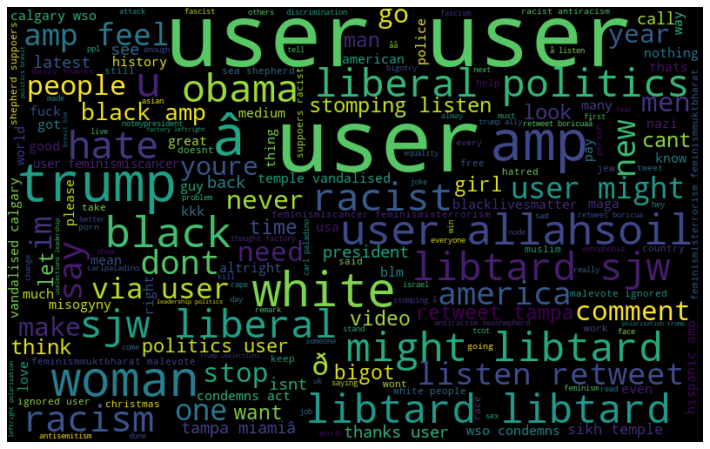

In [116]:
# frequently used negative words
all_words = " ".join([sentence for sentence in df_train['tweet'][df_train['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
# Print the percentage of negative tweets
ntweets = df_train[df_train['label']==1]
ntweets = ntweets['tweet']
ntweets

print('percent of negative tweets',round( (ntweets.shape[0] / df_train.shape[0]) * 100 , 1),"%")

percent of negative tweets 7.0 %


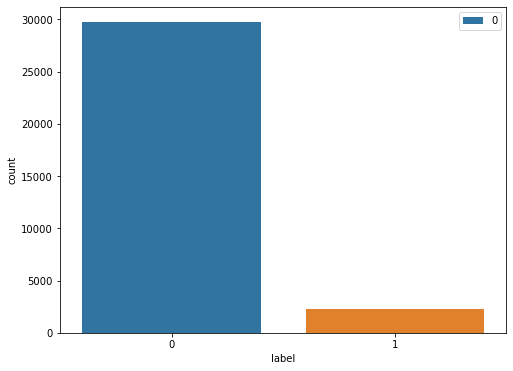

In [118]:
# Comparision of positive and negative tweets by visualization
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(df_train.label ,label=0)

plt.legend()

#### Dataset

In [119]:
x = df_train["tweet"]
y = df_train["label"]

### Vectorization

#### Count Vectorization or Bag of Words Method

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=3000,ngram_range=(1,3)) # top 3000 features are taken 
x_count=cv.fit_transform(x).toarray()


# Splitting the data
from sklearn.model_selection import train_test_split 
import sklearn.metrics


#Handling the unbalanced dataset
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_resamp,y_resamp=smote.fit_resample(x_count,y.ravel())

# Splitting  the data
x_train_count, x_test_count, y_train, y_test = train_test_split(x_resamp, y_resamp, test_size = 0.25,
                                                                    random_state = 11)


#### TF-IDF Method

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv=TfidfVectorizer(max_features=3000,ngram_range=(1,3)) # top 3000 features are taken 
x_tf_idf_word=cv.fit_transform(x).toarray()

#Handling the unbalanced dataset
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_resamp,y_resamp=smote.fit_resample(x_tf_idf_word,y.ravel())



# Splitting the data
from sklearn.model_selection import train_test_split 
import sklearn.metrics


x_train_tf_idf_word, x_test_tf_idf_word, y_train, y_test = train_test_split(x_resamp, y_resamp, test_size = 0.25,
                                                                    random_state = 11)

### Score Card Generator

In [147]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])



def updateScoreCard(model_name):
    global score_card
    
    score_card = score_card.append({'Model': model_name,
                                        'Precision Score': metrics.precision_score(y_test,test_pred),
                                        'Recall Score': metrics.recall_score(y_test,test_pred),
                                        'Accuracy Score': metrics.accuracy_score(y_test,test_pred),
                                        'f1-score': metrics.f1_score(y_test,test_pred)}, 
                                        ignore_index = True)
    return(score_card)

## MODEL BUILDING

### Logistic Regression

In [148]:
from sklearn import model_selection, preprocessing, linear_model, metrics

#### Count Vector Method

In [149]:
from sklearn.linear_model import LogisticRegression

log =LogisticRegression()
log_model = log.fit(x_train_count, y_train)

test_pred=log.predict(x_test_count)

accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           y_test,
                                           cv = 20).mean()

print("\nLogistic regression 'count-vectors' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('Logistic Regressio_Countvec')
getscore



Logistic regression 'count-vectors' method
Accuracy ratio:  0.9202557200538358
F1_Score:  0.9352593565331582


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259


#### Performed with Unbalanced Data

  Logistic regression 'count-vectors' method
  
  Accuracy ratio:  0.931923245614035
  
  F1_Score:  0.12374581939799331

F1_score is too low

#### Using TF-IDF

In [150]:
log = LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, y_train)

test_pred=log.predict(x_test_tf_idf_word)

accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           y_test,
                                           cv = 20).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('Log Regression TFIDF')
getscore



Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9051816958277256
F1_Score:  0.9271209831109943


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121


#### Performed with Unbalanced Data

  Logistic regression model with 'tf-idf' method
  
  Accuracy ratio:  0.931923245614035
  
  F1_Score:  0.12374581939799331

### Naive Bayes Model

In [151]:
from sklearn.naive_bayes import MultinomialNB

#### count-vector method

In [152]:
clf = MultinomialNB()
nb_model = clf.fit(x_train_count, y_train)

test_pred=clf.predict(x_test_count)

accuracy = model_selection.cross_val_score(nb_model,
                                           x_test_count,
                                           y_test,
                                           cv = 20).mean()

print("\nNaive Bayes 'count-vectors' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('Naive Bayes Countvec')
getscore



Naive Bayes 'count-vectors' method
Accuracy ratio:  0.8251682368775237
F1_Score:  0.9286303630363036


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863


#### Performed with Unbalanced Data
  Naive Bayes 'count-vectors' method
  
  Accuracy ratio:  0.9312973057644112
 
  F1_Score:  0.12374581939799331

#### TF-Idf Method

In [153]:
clf = MultinomialNB()
nb_model = clf.fit(x_train_tf_idf_word, y_train)

test_pred=clf.predict(x_test_tf_idf_word)

accuracy = model_selection.cross_val_score(nb_model,
                                           x_test_tf_idf_word,
                                           y_test,
                                           cv = 20).mean()

print("\nNaive Bayes with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))
#score
getscore=updateScoreCard('Naive Bayes TFIDF')
getscore


Naive Bayes with 'tf-idf' method
Accuracy ratio:  0.8702557200538358
F1_Score:  0.8894285907036362


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863
3,Naive Bayes TFIDF,0.882345,0.896627,0.889704,0.889429


#### Performed with Unbalanced Data
  Naive Bayes 'count-vectors' method
   
  Accuracy ratio:  0.9312973057644112

  F1_Score:  0.12374581939799331

### XGBoost Model

In [154]:
from xgboost import XGBClassifier

#### Count Vector

In [155]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count, y_train)

test_pred=xgb.predict(x_test_count)

accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_count,
                                           y_test,
                                           cv = 20).mean()

print("\nXgBoost 'count-vectors' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('XGboost Countvec')
getscore


XgBoost 'count-vectors' method
Accuracy ratio:  0.882436069986541
F1_Score:  0.901461693548387


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863
3,Naive Bayes TFIDF,0.882345,0.896627,0.889704,0.889429
4,XGboost Countvec,0.839671,0.973069,0.894751,0.901462


#### Performed with unbalanced 
XgBoost 'count-vectors' method

Accuracy ratio:  0.9326738721804512

F1_Score:  0.12374581939799331

#### TF-IDF

In [156]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word, y_train)

test_pred=xgb.predict(x_test_tf_idf_word)

accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_tf_idf_word,
                                           y_test,
                                           cv = 20).mean()

print("\nXGBoost model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('XGboost TFIDF')
getscore


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.8856662180349932
F1_Score:  0.8935988620199147


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863
3,Naive Bayes TFIDF,0.882345,0.896627,0.889704,0.889429
4,XGboost Countvec,0.839671,0.973069,0.894751,0.901462
5,XGboost TFIDF,0.936494,0.854461,0.899327,0.893599


#### Performed with unbalanced 
XgBoost with 'tf-idf'method

Accuracy ratio:  0.9326738721804512

F1_Score:  0.12374581939799331

### Lightgbm Model

In [157]:
from lightgbm import LGBMClassifier

#### Count Vector

In [158]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_count, y_train)

test_pred=lgbm.predict(x_test_count)

accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_count,
                                           y_test,
                                           cv = 20).mean()

print("\nLightGBM 'count-vectors' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('LightGBM Countvec')
getscore


LightGBM 'count-vectors' method
Accuracy ratio:  0.8921265141318978
F1_Score:  0.9051159834763266


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863
3,Naive Bayes TFIDF,0.882345,0.896627,0.889704,0.889429
4,XGboost Countvec,0.839671,0.973069,0.894751,0.901462
5,XGboost TFIDF,0.936494,0.854461,0.899327,0.893599
6,LightGBM Countvec,0.849457,0.96858,0.899529,0.905116


#### Performed with unbalanced 
LightGBM 'count-vectors' method

Accuracy ratio:  0.929796052631579

F1_Score:  0.06551724137931034

#### TF-IDF

#### Performed with unbalanced 
LightGBM 'with 'tf-idf' method

Accuracy ratio:  0.929796052631579

F1_Score:  0.06551724137931034

In [159]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word, y_train)

test_pred=lgbm.predict(x_test_tf_idf_word)

accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_tf_idf_word,
                                           y_test,
                                           cv = 20).mean()

print("\nLightGBM model(Balanced Data) with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)
print("F1_Score: ",sklearn.metrics.f1_score(test_pred,y_test))

#score
getscore=updateScoreCard('LightGBM TFIDF')
getscore


LightGBM model(Balanced Data) with 'tf-idf' method
Accuracy ratio:  0.8940780619111708
F1_Score:  0.9028147318302759


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regressio_Countvec,0.904037,0.968716,0.933647,0.935259
1,Log Regression TFIDF,0.896885,0.959467,0.92537,0.927121
2,Naive Bayes Countvec,0.93896,0.918526,0.930148,0.92863
3,Naive Bayes TFIDF,0.882345,0.896627,0.889704,0.889429
4,XGboost Countvec,0.839671,0.973069,0.894751,0.901462
5,XGboost TFIDF,0.936494,0.854461,0.899327,0.893599
6,LightGBM Countvec,0.849457,0.96858,0.899529,0.905116
7,LightGBM TFIDF,0.930303,0.876904,0.906595,0.902815


So we got Logistic Regression as the best Model

### ROC Curve with best model

In [160]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns

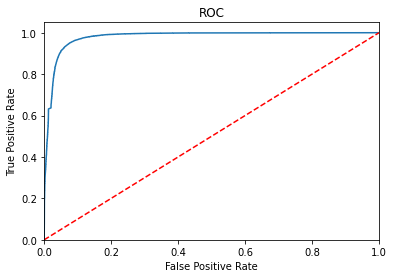

In [170]:
y = y_train
X = x_train_tf_idf_word
#X = x_train_count.astype("float64")

logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Prediction and Estimation over Test set

In [162]:
best_model=log_model
cv=CountVectorizer(max_features=3000,ngram_range=(1,3)) # top 3000 features are taken 
test=cv.fit_transform(df_test["tweet"]).toarray()

best_model.predict(test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

#### Checking for random tweets

In [163]:
test_file_1 = ["""white liberal and a very good black woman """]
print('Test file_1   : "white liberal and a very good black woman "')

test = cv.transform(test_file_1).toarray()
print('The Predicted Label is :',log_model.predict(test))



test_file_2=["""happy birthday love"""]
print('\ntest_file_2  :',"happy birthday love ")
test = cv.transform(test_file_2).toarray()
print('The Predicted Label is :',log_model.predict(test))

Test file_1   : "white liberal and a very good black woman "
The Predicted Label is : [1]

test_file_2  : happy birthday love 
The Predicted Label is : [0]


## Creating Submission file

In [164]:
#Best test Prediction with Best Model trained with full trained data

best_model=log_model

#fitting the model with full train data
cv=TfidfVectorizer(max_features=3000,ngram_range=(1,3)) # top 3000 features are taken 
test=cv.fit_transform(df_test["tweet"]).toarray()


#predicting the model with full test data
best_pred=best_model.predict(test)

In [165]:
df_sample

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,0


In [141]:
df_test_treated

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacist want everyone see new â...
2,31965,safe way heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservation already yes ð...
4,31967,rd bihday amazing hilarious nephew eli ahmir u...
...,...,...
17192,49155,thought factory leftright polarisation trump u...
17193,49156,feeling like mermaid ð hairflip neverready for...
17194,49157,hillary campaigned today ohioomg amp used word...
17195,49158,happy work conference right mindset lead cultu...


In [171]:
#df_test_treated=df_test_treated.drop('tweet',axis=1)

In [172]:
df_test_treated['tweet']=best_pred

In [173]:
submission_files=pd.DataFrame()
submission_files['id']=df_test_treated.loc[:,"id"]
submission_files["buy"]=df_test_treated.loc[:,"tweet"]
submission_files

,id,buy
0,31963,1
1,31964,0
2,31965,1
3,31966,1
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,0


In [174]:
#converting to csv file format
submission_files.to_csv('Twitter_log_model_1.csv', index = False)

In [175]:
pd.read_csv('Twitter_log_model_1.csv')

,id,buy
0,31963,1
1,31964,0
2,31965,1
3,31966,1
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,0
